# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- The idea is to go down the references network for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 


## To do:
- resolve identical label
- stats:  n ref vs n citation, review vs foundational
- coloring: disconnected component for the 1st generation references, authors based cluster 
- interactive flask app


## With more data:
- use 'store' from scopus manual export + [query ref resolver](https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/)

- get country/city/univ  get flag/favicon





In [6]:
import crossrefexp as exp

In [7]:
store = exp.MetaDataStore('data/metadata_cache01.pickle')

default pickle location set to data/metadata_cache01.pickle


In [8]:
# Query metadata on Crossref
store.query(['10.1063/1.3284082', '10.1063/1.3284086','10.1063/1.3284083' ])

metadata for 10.1063/1.3284082 retrieved from Crossref in 0.814950 s.
metadata for 10.1063/1.3284086 retrieved from Crossref in 0.750932 s.
metadata for 10.1063/1.3284083 retrieved from Crossref in 0.741735 s.
data/metadata_cache01.pickle saved.


growth achieved - 49 nodes in the graph. The last generation number is 1.
metadata for 10.1103/PhysRevA.68.014103 retrieved from Crossref in 1.458138 s.
metadata for 10.1103/PhysRevB.72.075423 retrieved from Crossref in 0.758207 s.
metadata for 10.1002/smll.200500204 retrieved from Crossref in 0.747979 s.
metadata for 10.1021/jp801781s retrieved from Crossref in 0.714360 s.
metadata for 10.1038/nature01773 retrieved from Crossref in 0.759345 s.
metadata for 10.1016/j.cplett.2008.08.089 retrieved from Crossref in 0.738740 s.
metadata for 10.1063/1.114701 retrieved from Crossref in 0.752499 s.
metadata for 10.1063/1.1485306 retrieved from Crossref in 0.740814 s.
metadata for 10.1103/PhysRevB.57.9780 retrieved from Crossref in 0.740969 s.
metadata for 10.1103/PhysRevB.57.9971 retrieved from Crossref in 0.765282 s.
metadata for 10.1038/35044012 retrieved from Crossref in 0.724790 s.
metadata for 10.1063/1.1985978 retrieved from Crossref in 0.724318 s.
metadata for 10.1126/science.290.5490.

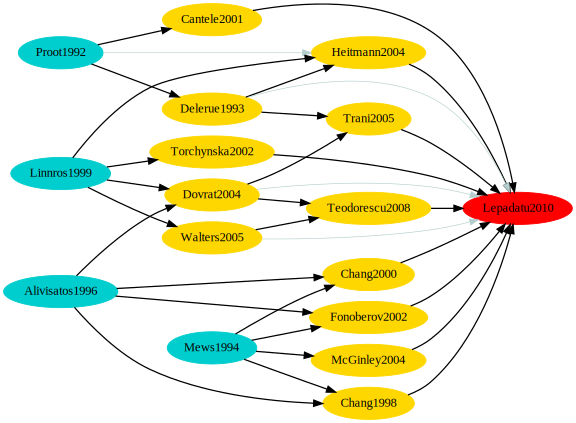

In [9]:
# Build the graph and everything:
gr = store.get_refgraphviz( '10.1063/1.3284083', gen=2, top=4 )
gr

In [10]:
# List of the top cited refs.
gr = store.build_a_refgraph( '10.1063/1.3284083', gen=2 )
print('-- Top cited: --')
for doi, citedby_count in gr.most_cited()[:10]:
    metadata = store.get(doi)
    print( '{}\t cited {} times [gen{}]  {}'.format(metadata.label(),
                                                   citedby_count, 
                                                   gr[doi]['gen'],
                                                   metadata.get('URL')) )

growth achieved - 49 nodes in the graph. The last generation number is 1.
growth achieved - 686 nodes in the graph. The last generation number is 2.
-- Top cited: --
Mews1994	 cited 4 times [gen2]  http://dx.doi.org/10.1021/j100054a032
Alivisatos1996	 cited 4 times [gen2]  http://dx.doi.org/10.1126/science.271.5251.933
Linnros1999	 cited 4 times [gen2]  http://dx.doi.org/10.1063/1.371663
Proot1992	 cited 3 times [gen2]  http://dx.doi.org/10.1063/1.108372
54128	 cited 3 times [gen2]  None
53465	 cited 3 times [gen2]  None
87051	 cited 3 times [gen2]  None
63503	 cited 3 times [gen2]  None
Yoffe2001	 cited 3 times [gen1]  http://dx.doi.org/10.1080/00018730010006608
Dovrat2004	 cited 3 times [gen1]  http://dx.doi.org/10.1103/physrevb.69.155311
